# MOVIE LAND PROJECT

## Buiseness understanding

The purpose of this analysis is to help Movieland gain insights into the most well-received movie based on viewer ratings and reviews. By analyzing the IMDb review dataset, the company can determine the movie with the highest average rating and the number of reviewers who gave it the highest rating. Additionally, Movieland can also determine the least favorable rating and the corresponding review detail for the movie with the highest average rating. This information can help the company make informed decisions about their next project and target a similar audience.

By understanding the most well-received movie and the reasons why it was well received, Movieland can aim to create similar content that appeals to a similar audience. On the other hand, by understanding the least favorable rating and review, the company can avoid making similar mistakes in their next project.

In [97]:
# Import pand/as
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# load the dataset
df = pd.read_csv('dataset/imdb_top_1000.csv')
#print the first five
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## EDA and Cleaning

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [100]:
# Since we are looking at reviews and ratings we can drop the irrelevant columns
df = df.drop( ['Poster_Link', 'Star1', 'Star2', 'Star3','Star4', 'Director','Certificate'],axis = 1)

In [101]:
# checking for duplicates
df = df.drop_duplicates()

In [102]:
df.isna().sum()

Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
No_of_Votes        0
Gross            169
dtype: int64

In [103]:
df = df.dropna()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 997
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   750 non-null    object 
 1   Released_Year  750 non-null    object 
 2   Runtime        750 non-null    object 
 3   Genre          750 non-null    object 
 4   IMDB_Rating    750 non-null    float64
 5   Overview       750 non-null    object 
 6   Meta_score     750 non-null    float64
 7   No_of_Votes    750 non-null    int64  
 8   Gross          750 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 58.6+ KB


In [105]:
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,30144,"696,690"
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,45338,"1,378,435"
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,166409,"141,843,612"
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,40351,"13,780,024"


In [106]:
# Group the data by movie and calculate the average rating for each movie
movie_ratings = df.groupby("Series_Title").mean()
movie_ratings = movie_ratings.sort_values(by=['IMDB_Rating'], ascending=False)
movie_ratings

,IMDB_Rating,Meta_score,No_of_Votes
Series_Title,,,
The Shawshank Redemption,9.3,80.0,2343110.0
The Godfather,9.2,100.0,1620367.0
12 Angry Men,9.0,96.0,689845.0
The Godfather: Part II,9.0,90.0,1129952.0
The Dark Knight,9.0,84.0,2303232.0
...,...,...,...
Incredibles 2,7.6,80.0,250057.0
Hævnen,7.6,65.0,38491.0
Huo Yuan Jia,7.6,70.0,72863.0


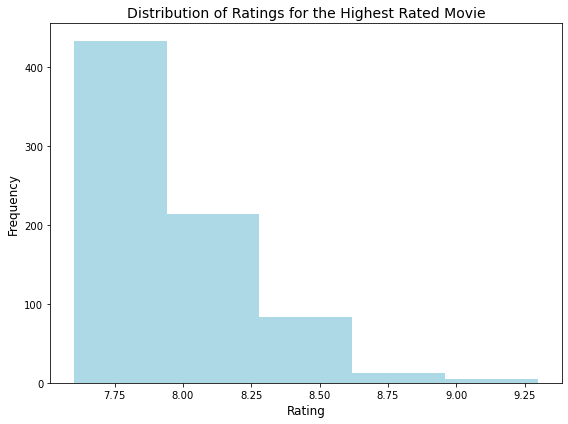

In [122]:
# Visualize the distribution of ratings for the highest rated movie using a histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(movie_ratings["IMDB_Rating"], bins=5, color="lightblue")
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Distribution of Ratings for the Highest Rated Movie", fontsize=14)
plt.tight_layout()
plt.show()


## Which movie had the highest rating?

In [107]:
# Find the movie with the highest average rating
highest_rated_movie = movie_ratings.head(1)
highest_rated_movie 

,IMDB_Rating,Meta_score,No_of_Votes
Series_Title,,,
The Shawshank Redemption,9.3,80.0,2343110.0


## How many reviewers gave it the highest rating?

In [108]:
# Count the number of reviews with the maximum rating for the highest rated movie
highest_rating_count = movie_ratings['No_of_Votes'][0]
highest_rating_count

2343110.0

## What’s its least rating and review detail? 

In [109]:
# Find the lowest rating and its associated review detail for the highest rated movie
least_rating = movie_ratings.tail(1)
# least_rating_review = sorted_reviews.iloc[0]["review"]
least_rating

,IMDB_Rating,Meta_score,No_of_Votes
Series_Title,,,
The Peanut Butter Falcon,7.6,70.0,66346.0


# Conclusion